### A/B test in code for chi square

Focus here is to look at change in P-value as samples are collected
- does p-value give a definitive answer to question
- what are the drawbacks of using this stats test

### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

### Set up a DataGenerator Class

In [2]:
# Set up data generator class
class DataGenerator:
    def __init__(self, p1, p2):
        self.p1 = p1 # Probability of click for group 1
        self.p2 = p2 # Probability of click for group 2
    
    def next(self):
        '''
        Whether person clicked on ad 1 or ad 2
        '''
        click1 = 1 if (np.random.random() < self.p1) else 0
        click2 = 1 if (np.random.random() < self.p2) else 0
        return click1, click2            

### Get P value Function

In [3]:
def get_p_value(T):
    det = T[0,0]*T[1,1] - T[0,1]*T[1,0]
    # Chi2 test stat Per previous lecture formula - terms rearranged a bit
    c2 = float(det) / T[0].sum() * det / T[1].sum() * T.sum() / T[:,0].sum() / T[:,1].sum()
    # Pass the test stat to the imported chi2 method
    p = 1 - chi2.cdf(x=c2, df=1)
    return p

### Run Experiment Function

In [4]:
def run_experiment(p1, p2, N):
    '''
    p1: prob of click for group 1
    p2: prob of click for group 1
    N: Number of samples
    '''
    # Create instance of DataGenerator
    data = DataGenerator(p1, p2)
    # Get p-values in an array to fill in later
    p_values = np.empty(N)
    # Create contingency table
    T = np.zeros((2, 2)).astype(np.float32)
    # Loop through each trial
    for i in range(N):
        # Determine if ad1 and ad 2 were clicked on (1) or not (0)
        c1, c2 = data.next()
        # Puts clicks in first column / no click in second
        T[0,c1] += 1 
        # Puts clicks in second column / no click in first
        T[1,c2] += 1
        # Ignore first few values because the contengency table is not yet populated
        if i < 10:
            p_values[i] = None
        # Else calc the statistic
        else:
            p_values[i] = get_p_value(T)
    # Once looped through, plot the p values
    plt.plot(p_values)
    # Also plot the threshold - assume alpha of 5%
    plt.plot(np.ones(N)*0.05)
    plt.show()            

### Run The Experiment

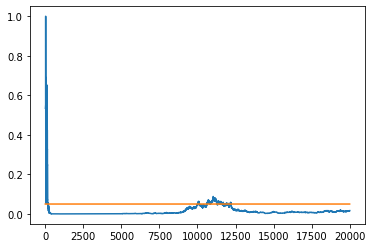

In [5]:
# Use a click rate of 0.1 vs 0.11 over 20000 samples
run_experiment(0.1, 0.11, 20000)

Run the above a few times and see each case of:
- Becoming significant and staying there
- Going below significance threshold and then back up
- Stays above significance threshold and then below

P Value has to be below significance threshold 5% of the time